In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

### Games Data Frame 

In [2]:
games_df=pd.read_csv('../nfl_data/games.csv')
games_df

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week
0,2018090600,09/06/2018,20:20:00,PHI,ATL,1
1,2018090901,09/09/2018,13:00:00,CLE,PIT,1
2,2018090902,09/09/2018,13:00:00,IND,CIN,1
3,2018090903,09/09/2018,13:00:00,MIA,TEN,1
4,2018090900,09/09/2018,13:00:00,BAL,BUF,1
...,...,...,...,...,...,...
248,2018123013,12/30/2018,16:25:00,DEN,LAC,17
249,2018123015,12/30/2018,16:25:00,SEA,ARI,17
250,2018123014,12/30/2018,16:25:00,LA,SF,17
251,2018122200,12/22/2018,16:30:00,TEN,WAS,16


In [3]:
#Checking for missing values 
games_df.isnull().sum()

gameId             0
gameDate           0
gameTimeEastern    0
homeTeamAbbr       0
visitorTeamAbbr    0
week               0
dtype: int64

### Plays data frame

In [4]:
#Plays data frame 
plays_df=pd.read_csv('../nfl_data/plays.csv')
pd.set_option('display.max_columns', None)
plays_df.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,personnelD,typeDropback,preSnapVisitorScore,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,SINGLEBACK,"1 RB, 1 TE, 3 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,SHOTGUN,"2 RB, 1 TE, 2 WR",6.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,5.0,"4 DL, 1 LB, 6 DB",SCRAMBLE_ROLLOUT_LEFT,0.0,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,SHOTGUN,"2 RB, 3 TE, 0 WR",8.0,6.0,"6 DL, 3 LB, 2 DB",TRADITIONAL,0.0,0.0,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False


In [5]:
#Checking for missing values 
plays_df.isnull().sum().sort_values(ascending=False)

penaltyCodes              18033
penaltyJerseyNumbers      18033
preSnapVisitorScore         639
typeDropback                639
gameClock                   639
absoluteYardlineNumber      639
preSnapHomeScore            639
numberOfPassRushers         633
yardlineSide                254
offenseFormation            141
defendersInTheBox            62
personnelO                   29
personnelD                   29
passResult                    2
offensePlayResult             0
playResult                    0
epa                           0
gameId                        0
playId                        0
yardlineNumber                0
playType                      0
possessionTeam                0
yardsToGo                     0
down                          0
quarter                       0
playDescription               0
isDefensivePI                 0
dtype: int64

### Players data frame 

In [6]:
#players data frame 
players_df=pd.read_csv('../nfl_data/players.csv')
players_df.head()

,nflId,height,weight,birthDate,collegeName,position,displayName
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell


In [7]:
#checking missing values 
players_df.isnull().sum()

nflId          0
height         0
weight         0
birthDate      0
collegeName    0
position       0
displayName    0
dtype: int64

### Player tracking data 

In [8]:

players_tracking_data=pd.read_csv('../nfl_data/week1.csv')
players_tracking_data.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
0,2018-09-07T01:07:14.599Z,91.73,26.67,0.00,0.01,0.02,289.57,240.93,None,310.0,Matt Ryan,2.0,QB,1,away,2018090600,75,left,NaN
1,2018-09-07T01:07:14.599Z,88.89,36.47,0.01,0.01,0.01,105.63,66.66,None,79848.0,Malcolm Jenkins,27.0,SS,1,home,2018090600,75,left,NaN
2,2018-09-07T01:07:14.599Z,91.35,44.16,0.02,0.03,0.01,290.45,16.86,None,2495454.0,Julio Jones,11.0,WR,1,away,2018090600,75,left,HITCH
3,2018-09-07T01:07:14.599Z,86.31,22.01,0.09,0.42,0.01,70.12,168.91,None,2495613.0,Corey Graham,24.0,FS,1,home,2018090600,75,left,NaN
4,2018-09-07T01:07:14.599Z,90.78,36.15,0.00,0.00,0.00,257.61,193.97,None,2533040.0,Mohamed Sanu,12.0,WR,1,away,2018090600,75,left,HITCH


In [9]:
players_tracking_data.isnull().sum().sort_values(ascending=False)

route            712708
o                 66913
position          66913
jerseyNumber      66913
dir               66913
nflId             66913
dis                   0
a                     0
event                 0
x                     0
displayName           0
s                     0
y                     0
frameId               0
team                  0
gameId                0
playId                0
playDirection         0
time                  0
dtype: int64

# Examine the Plays data 

We begin by examining the EPA for each of the top 10 most used defensive formations during the 2018 season. For reference: 
- __Expected Points (EP)__ – _The value of the current down, distance, and field position situation in terms of future expected net point advantage. In other words, it is the net point value a team can expect given a particular combination of down, distance, and field position. First and goal at the one represents an EP near 6, while 3rd and 20 at a team’s own one yard line represents an EP of about -2. EP differs from Win Probability (WP) in that it does not take into account the game score and time remaining._
- __Expected Points Added (EPA)__ – _The difference between the Expected Points (EP) at the start of a play and the EP at the end of they play. EPA is the measure of a play’s impact on the score of the game. An individual player’s EPA is the sum of the EPA of the plays in which that player was directly involved. Being directly involved is defined as an offensive player who ran, threw, or kicked the ball, was targeted by a pass, or flagged for a penalty._

In [10]:
plays_df.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,personnelD,typeDropback,preSnapVisitorScore,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,SINGLEBACK,"1 RB, 1 TE, 3 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,SHOTGUN,"2 RB, 1 TE, 2 WR",6.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,5.0,"4 DL, 1 LB, 6 DB",SCRAMBLE_ROLLOUT_LEFT,0.0,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,SHOTGUN,"2 RB, 3 TE, 0 WR",8.0,6.0,"6 DL, 3 LB, 2 DB",TRADITIONAL,0.0,0.0,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False


In [11]:
#Begin by seeing if there is a correlation between defensive formations and the epa 
#of an offensive play. 

#data frame consisting of positive epa
epa_pos_df=plays_df.loc[plays_df.epa>0]
#data frame consisting of negative epa 
epa_neg_df=plays_df.loc[plays_df.epa<0]

In [12]:
#Getting a feel for the most used defensive personnel
epa_pos_df.personnelD.value_counts()
#11 players on defense 

4 DL, 2 LB, 5 DB                    2828
3 DL, 3 LB, 5 DB                    1293
4 DL, 3 LB, 4 DB                    1114
2 DL, 4 LB, 5 DB                     842
4 DL, 1 LB, 6 DB                     406
3 DL, 2 LB, 6 DB                     386
2 DL, 3 LB, 6 DB                     378
3 DL, 4 LB, 4 DB                     352
1 DL, 4 LB, 6 DB                     109
1 DL, 5 LB, 5 DB                      98
5 DL, 2 LB, 4 DB                      41
1 DL, 3 LB, 7 DB                      31
3 DL, 1 LB, 7 DB                      29
2 DL, 2 LB, 7 DB                      21
4 DL, 4 LB, 3 DB                      14
4 DL, 0 LB, 7 DB                      13
0 DL, 4 LB, 7 DB                      10
5 DL, 3 LB, 3 DB                       6
6 DL, 3 LB, 2 DB                       6
6 DL, 4 LB, 1 DB                       6
0 DL, 5 LB, 6 DB                       4
5 DL, 1 LB, 5 DB                       4
4 DL, 5 LB, 2 DB                       3
0 DL, 6 LB, 5 DB                       2
6 DL, 1 LB, 4 DB

In [13]:
#take the top 10 most used defensive formations during this season
#(other formations are too small to be of significance)
def_form=['4 DL, 2 LB, 5 DB',       
'3 DL, 3 LB, 5 DB',                    
'4 DL, 3 LB, 4 DB',                    
'2 DL, 4 LB, 5 DB',                     
'4 DL, 1 LB, 6 DB',                    
'3 DL, 2 LB, 6 DB',                    
'2 DL, 3 LB, 6 DB',                     
'3 DL, 4 LB, 4 DB',
'1 DL, 4 LB, 6 DB',         
'1 DL, 5 LB, 5 DB']

In [14]:
#Creating data frame with postive epas and the top 10 defensive formations
epa_pos_df=epa_pos_df.loc[epa_pos_df['personnelD'].isin(def_form)]
#Creating data frame with negative epas and the top 10 defensive formations
epa_neg_df=epa_neg_df.loc[epa_neg_df['personnelD'].isin(def_form)]

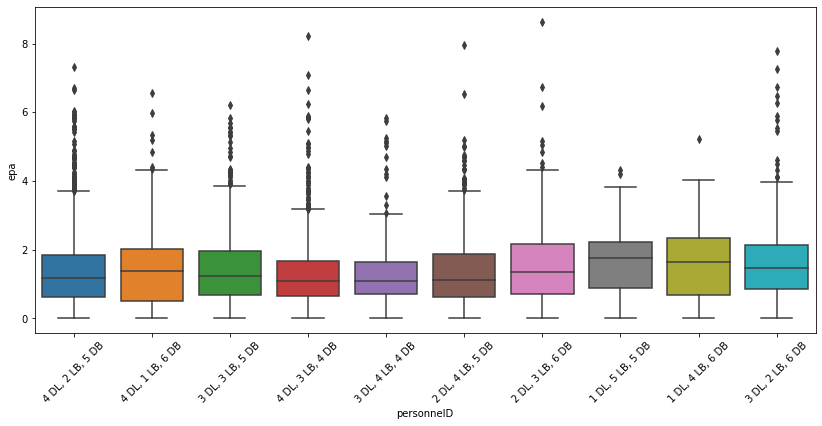

In [15]:
#box plot to see if there is any relation the defensive formations and 
#positive epas 

#May mean that those defensive formations don't lend well to offensive pass plays 
plt.figure(figsize=(14,6))

ax=sns.boxplot(x="personnelD", y="epa", data=epa_pos_df)

plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

From this box plot: 
- It looks like the 3-4 defensive formations (3 down lineman with 4 linebackers) with dime packages (6 defensive backs) allowed the most expected points allowed during the season. This corresponds to the personnelD with '1 DL, 5LB, 5DB' and '1DL, 4LB, 6DB'

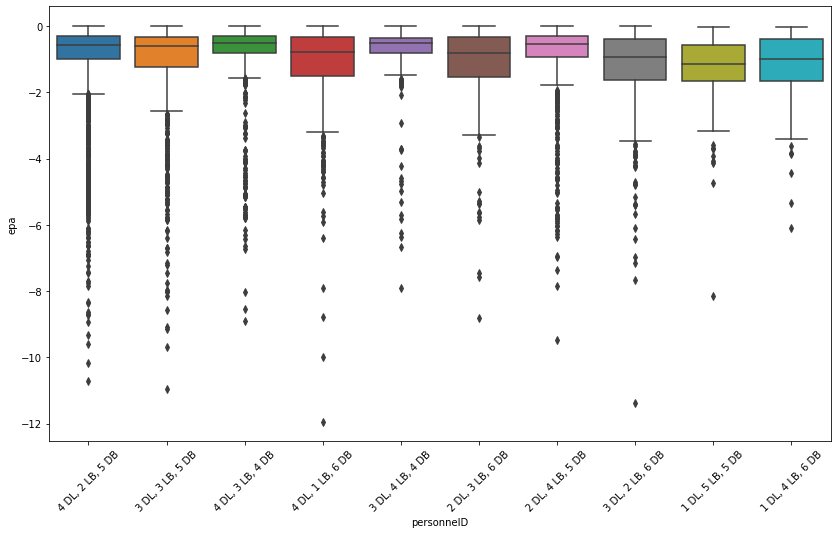

In [16]:
#box plot to see if there is any relation the defensive formations and 
#negative epas 

#May mean that those defensive formations are better against certain offensive formations 
plt.figure(figsize=(14,8))

ax=sns.boxplot(x="personnelD", y="epa", data=epa_neg_df)

plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

- It looks like the 4-3 defensive formations (4 down lineman with 3 linebackers) with 4 and 5 defensive backs have the most negative expected points allowed during the season. This corresponds to the personnelD with '4 DL, 3LB, 4DB' and '3DL, 4LB, 4DB'. There were others that did well to limit the epa such as the 3-3-5 and 2-4-5 formations. All values are pretty close though. 

## Create pivot tables to see what the net average epa was for each defensive formation

In [17]:
#gather the data frame for the top 10 used defensive formations
top_10_def_df=plays_df.loc[plays_df['personnelD'].isin(def_form)]
top_10_def_df.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,personnelD,typeDropback,preSnapVisitorScore,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,SINGLEBACK,"1 RB, 1 TE, 3 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,SHOTGUN,"2 RB, 1 TE, 2 WR",6.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,5.0,"4 DL, 1 LB, 6 DB",SCRAMBLE_ROLLOUT_LEFT,0.0,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False
5,2018090600,320,(10:10) (Shotgun) N.Foles pass short left to N...,1,2,8,PHI,play_type_pass,PHI,4,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,4.0,"3 DL, 3 LB, 5 DB",TRADITIONAL,0.0,0.0,10:10:00,14.0,NaN,NaN,C,4,4,-0.344096,False


In [18]:
#pivot table examining the relationship between the mean epa, defensive formation, and 
#offensive resultb
df_pivot1=pd.pivot_table(data=top_10_def_df, index=['personnelD'], columns=['passResult'], 
                         values=['epa'])
#reorder the pivot table from highest average epa on completed passes to lowest 
df1 = df_pivot1.reindex(df_pivot1['epa'].sort_values(by='C', ascending=False).index)
df1

epa                                        
passResult               C         I        IN         R         S
personnelD                                                        
1 DL, 5 LB, 5 DB  0.918016 -0.902776 -2.833287       NaN -2.354752
1 DL, 4 LB, 6 DB  0.876431 -0.944621 -2.395633       NaN -1.962409
3 DL, 4 LB, 4 DB  0.808098 -0.434067 -4.746428       NaN -1.221244
2 DL, 3 LB, 6 DB  0.796941 -0.698525 -3.716021       NaN -1.884428
4 DL, 3 LB, 4 DB  0.760551 -0.462369 -4.811252       NaN -1.229185
3 DL, 2 LB, 6 DB  0.754116 -0.811513 -4.144189       NaN -1.733528
3 DL, 3 LB, 5 DB  0.718011 -0.640974 -4.474617       NaN -1.605728
4 DL, 2 LB, 5 DB  0.705763 -0.618046 -4.427722       NaN -1.639121
2 DL, 4 LB, 5 DB  0.639444 -0.647286 -4.661279  0.870164 -1.264577
4 DL, 1 LB, 6 DB  0.606808 -0.784255 -4.512280       NaN -1.768501

From this pivot table we can see the following information: 
- Upon a completed pass, the defense with 1DL, 5LB, 5DB tends to have on average the most epa after the offensive play. 
- On the other side, when the defense has 4DL, 1LB, 6DB, the epa is the smallest. 
- Relative to the number of times the formations were called though, it looks like the 3-3-5, 4-2-5, and 2-4-5 defensive formations had the some of the smallest EPA upon a completed pass. 

#### Create pivot tables to examine the average yards completed on each of the top 10 most use defensive formations. 

In [19]:
#pivot table examining the relationship between the mean offensive result (including penalties) 
#defensive formation, and pass result 
df_pivot2=pd.pivot_table(data=top_10_def_df, index=['personnelD'], columns=['passResult'], 
                         values=['playResult'])

#reorder the pivot table from highest average completion yards to lowest 
df2 = df_pivot2.reindex(df_pivot2['playResult'].sort_values(by='C', ascending=False).index)
df2

playResult                              
passResult                C         I   IN    R         S
personnelD                                               
3 DL, 4 LB, 4 DB  12.741794  1.126761  0.0  NaN -5.222222
1 DL, 4 LB, 6 DB  12.319728  0.578947  0.0  NaN -9.238095
4 DL, 3 LB, 4 DB  12.241083  0.821727  0.0  NaN -5.460938
3 DL, 2 LB, 6 DB  11.729682  0.662050  0.0  NaN -7.586207
2 DL, 3 LB, 6 DB  11.613636  1.232026  0.0  NaN -6.454545
4 DL, 2 LB, 5 DB  10.976588  0.876798  0.0  NaN -6.560680
3 DL, 3 LB, 5 DB  10.844298  0.844985  0.0  NaN -6.686636
2 DL, 4 LB, 5 DB  10.738133  0.708841  0.0  5.0 -6.000000
4 DL, 1 LB, 6 DB  10.625796  0.721448  0.0  NaN -7.191489
1 DL, 5 LB, 5 DB  10.541985  0.962264  0.0  NaN -7.347826

From this pivot table we can gather that: 
- Upon a completed pass on average, the 3DL, 4LB, 4DB had the most passing yards completed on them. 
- Upon a completed pass on average on average, the 1DL, 5LB, 5DB had the least passing yards completed on them.(this could be due to a small sample size compared to the other defensive formations).
    - Some other defensive formations to consider with this stat are the 4DL, 1LB, 6DB (4-3 dime defense), 2DL, 4LB, 5DB (3-4 nickel defense). 

In [31]:
#pivot table examining the relationship between the mean offensive result 
#(excluding penalties) defensive formation, and pass result

df_pivot3=pd.pivot_table(data=top_10_def_df, index=['personnelD'], columns=['passResult'],
               values=['offensePlayResult'])

#reorder the pivot table from highest average completion yards to lowest 
df3 = df_pivot3.reindex(df_pivot3['offensePlayResult'].sort_values(by='C', ascending=False).index)
df3

offensePlayResult                         
passResult                       C    I   IN    R         S
personnelD                                                 
3 DL, 4 LB, 4 DB         12.853392  0.0  0.0  NaN -6.460317
4 DL, 3 LB, 4 DB         12.264201  0.0  0.0  NaN -6.132812
1 DL, 4 LB, 6 DB         12.231293  0.0  0.0  NaN -7.428571
2 DL, 3 LB, 6 DB         11.738636  0.0  0.0  NaN -6.666667
3 DL, 2 LB, 6 DB         11.678445  0.0  0.0  NaN -7.482759
4 DL, 2 LB, 5 DB         11.126276  0.0  0.0  NaN -6.434466
3 DL, 3 LB, 5 DB         11.003289  0.0  0.0  NaN -6.981567
1 DL, 5 LB, 5 DB         10.954198  0.0  0.0  NaN -6.782609
2 DL, 4 LB, 5 DB         10.916930  0.0  0.0  2.0 -6.800000
4 DL, 1 LB, 6 DB         10.840764  0.0  0.0  NaN -6.893617

From this pivot table: 
- It looks like when defenses were in the 3-3-5, 2-4-5, 4-2-5 formations, they had the least amount of average yards completed.
    - We could also include the 1-5-5, 4-1-6 defensive formation, but the the other three formations were called significantly more in comparison. 

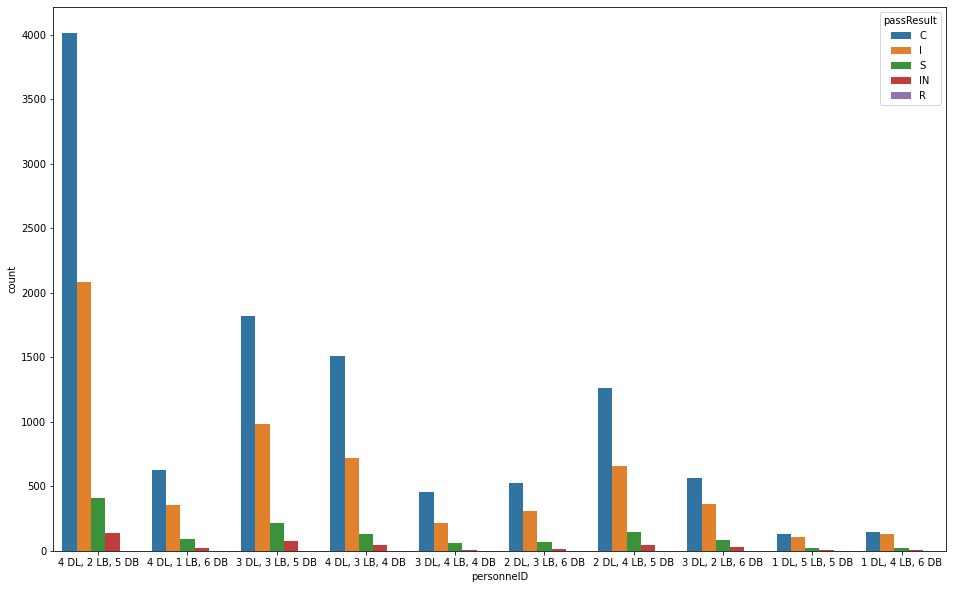

In [21]:
#create countplot for the number of completions (C), incompletions (I), 
#sacks (S), intercepted pass (IN), 
plt.figure(figsize = (16,10))
sns.countplot(x='personnelD', data=top_10_def_df, hue='passResult')
plt.show()

- From this count plot, we can see that the 4DL, 2LB, 5DB (4-3 nickel) has the most completions against them. After that, defensive formations '3DL, 3LB, 5DB', '4DL 3LB, 4DB', and '2DL, 4LB, 5DB',  had the most completions. 
    - Something to keep in mind is that each of these had the most incompletions and got the most sacks as well. 

_Conclusion:_

_From examining this count plot as well as pivot tables, it seems (preliminarily) that the 4-2-5, 3-3-5, and 2-4-5 base defenses had the best success against the pass. This is based on the number of times that those specific defensive formations were called and comparing those numbers to the countplots, and pivot tables. Ideally, when examining this information, we want a small average epa as well as a small number of average completion yards. If we consider both of those stats in terms of the 4-2-5, 3-3-5, and 2-4-5 defensive formations, they are consistently the smallest when these specific defenses are on the field. There may need to be some scaling that needs to be done._

### Examine the influence of defenders in the box and number of pass rushers on the number of passes completed and completion yards. 

In [22]:
plays_df.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,personnelD,typeDropback,preSnapVisitorScore,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,SINGLEBACK,"1 RB, 1 TE, 3 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,SHOTGUN,"2 RB, 1 TE, 2 WR",6.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,5.0,"4 DL, 1 LB, 6 DB",SCRAMBLE_ROLLOUT_LEFT,0.0,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,SHOTGUN,"2 RB, 3 TE, 0 WR",8.0,6.0,"6 DL, 3 LB, 2 DB",TRADITIONAL,0.0,0.0,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False


### Defenders in the Box analysis 
For reference on 'the box' in football see: https://www.quora.com/What-is-the-box-when-referring-to-defenses-in-American-football

In [23]:
plays_df.defendersInTheBox.value_counts()

6.0     8825
7.0     4401
5.0     3450
4.0     1170
8.0     1059
3.0      133
9.0       77
10.0      31
11.0      15
2.0       14
1.0        2
Name: defendersInTheBox, dtype: int64

In [33]:
#pivot table examining the relationship between the defenders in the box, average completion
#yards (excluding penalties), and pass result
def_in_box_pivot=pd.pivot_table(data=top_10_def_df, index=['defendersInTheBox'], 
                                columns=['passResult'],
                                   values=['offensePlayResult'])

#reorder the pivot table from highest average completion yards to lowest 
def_in_box_pivot = def_in_box_pivot.reindex(def_in_box_pivot['offensePlayResult'].sort_values(by='C', ascending=False).index)
def_in_box_pivot

offensePlayResult                         
passResult                        C    I   IN    R         S
defendersInTheBox                                           
8.0                       12.807292  0.0  0.0  NaN -6.471429
7.0                       12.089564  0.0  0.0  NaN -6.680297
5.0                       11.326019  0.0  0.0  NaN -6.783465
4.0                       11.078752  0.0  0.0  NaN -6.676471
6.0                       10.936584  0.0  0.0  2.0 -6.646154
3.0                       10.196078  0.0  0.0  NaN -7.400000
2.0                        7.714286  0.0  NaN  NaN       NaN
9.0                        7.606061  0.0  NaN  NaN -7.333333

From this pivot table: 
- We get what one would expect: if you have more defenders in the box, this could result in more average yards completed on the passing play. This could be a result of man coverage with no safety help.
- With 6 defenders in box (the most used result) we are in the middle of the pack completion average wise. 

In [25]:
#pivot table examining the relationship between the defenders in the box, average completion
#yards (excluding penalties), and pass result
def_in_box_pivot_sacks=pd.pivot_table(data=top_10_def_df, index=['defendersInTheBox'],
                                      columns=['passResult'],
                                       values=['offensePlayResult'])

#reorder the pivot table from highest average sack yards to lowest 
def_in_box_pivot_sacks = def_in_box_pivot.reindex(def_in_box_pivot['offensePlayResult'].sort_values(by='S', ascending=True).index)
def_in_box_pivot_sacks

offensePlayResult                         
passResult                        C    I   IN    R         S
defendersInTheBox                                           
3.0                       10.196078  0.0  0.0  NaN -7.400000
9.0                        7.606061  0.0  NaN  NaN -7.333333
5.0                       11.326019  0.0  0.0  NaN -6.783465
7.0                       12.089564  0.0  0.0  NaN -6.680297
4.0                       11.078752  0.0  0.0  NaN -6.676471
6.0                       10.936584  0.0  0.0  2.0 -6.646154
8.0                       12.807292  0.0  0.0  NaN -6.471429
2.0                        7.714286  0.0  NaN  NaN       NaN

From this pivot table: 
- It seems that if you have 3, 9, or 5 people in the box that there is more average sack yardage. There could be some scaling issue here though. Blitzes need to also be taken into account. 

### Number of Pass Rushers Analysis 
Note that a pass rusher is simply anybody who rushes the quarterback on a passing play. This is normally the defensive lineman, but could be linebackers, or secondary personel. This will allow us to determine if there were any blitzers in the formations. 

In [26]:
plays_df.numberOfPassRushers.value_counts()

4.0     11521
5.0      3646
3.0      1597
6.0      1136
2.0       253
7.0       242
0.0       106
1.0        73
8.0        30
9.0         1
10.0        1
Name: numberOfPassRushers, dtype: int64

In [27]:
#pivot table examining the relationship between the number of pass rushers, average completion
#yards (excluding penalties), and pass result
pass_rush_pivot=pd.pivot_table(data=top_10_def_df, index=['numberOfPassRushers'], 
                    columns=['passResult'],
               values=['offensePlayResult'])

#reorder the pivot table from highest average sack yards to lowest 
pass_rush_pivot = pass_rush_pivot.reindex(pass_rush_pivot['offensePlayResult'].sort_values(by='C', ascending=False).index)
pass_rush_pivot

offensePlayResult                    
passResult                          C    I   IN         S
numberOfPassRushers                                      
7.0                         15.077670  0.0  0.0 -7.357143
6.0                         14.106667  0.0  0.0 -7.411290
5.0                         12.331322  0.0  0.0 -6.716511
4.0                         11.111456  0.0  0.0 -6.532751
3.0                         10.222664  0.0  0.0 -6.369565
2.0                          8.533708  0.0  0.0 -0.500000
0.0                          7.833333  0.0  NaN -7.000000
8.0                          7.571429  0.0  0.0  0.000000
1.0                          5.734375  0.0  NaN       NaN

From this pivot table: 
- When we have 5, 6, or 7 pass rushers we tend to give up the most passing yards on average. 
- Intersting that when you rush 7 (probably a blitz) you give up way more yardage on average, if you just run 4. 

In [28]:
#pivot table examining the relationship between the number of pass rushers, 
#average completion, yards (excluding penalties), pass result, and defensive 
#personnel formation
pass_rush_pivot=pd.pivot_table(data=top_10_def_df, index=['personnelD','numberOfPassRushers'], 
                    columns=['passResult'],
               values=['offensePlayResult'])

#organize the pivot table according to the defensive formation and the number of pass rushers
#this may help us see which defensive formations blitzed more and consequentely which 
#players were in coverage for passing plays. 

#at this point, I think we can probably only examine the 3-3-5, 4-3-5, 2-4-5
pd.set_option('display.max_rows', None)
pass_rush_pivot

offensePlayResult                     
passResult                                           C    I   IN          S
personnelD       numberOfPassRushers                                       
1 DL, 4 LB, 6 DB 0.0                          5.000000  0.0  NaN        NaN
                 2.0                          5.250000  0.0  NaN        NaN
                 3.0                         16.222222  0.0  NaN  -9.000000
                 4.0                         11.714286  0.0  0.0  -7.272727
                 5.0                         12.441176  0.0  0.0  -7.714286
                 6.0                         12.416667  0.0  0.0  -4.000000
                 7.0                          6.000000  0.0  NaN        NaN
                 8.0                               NaN  0.0  NaN        NaN
1 DL, 5 LB, 5 DB 0.0                               NaN  0.0  NaN        NaN
                 2.0                         15.000000  0.0  NaN        NaN
                 3.0                         11.428571  0.0  0.0  -7.500000
                 4.0                         11.160494  0.0  0.0  -4.400000
                 5.0                          8.166667  0.0  NaN  -8.222222
                 6.0                         11.428571  0.0  0.0 -10.000000
                 7.0                               NaN  0.0  0.0 -13.000000
2 DL, 3 LB, 6 DB 0.0                          2.500000  0.0  NaN        NaN
                 1.0                          8.000000  0.0  NaN        NaN
                 2.0                         12.250000  0.0  0.0        NaN
                 3.0                         10.471429  0.0  0.0  -8.600000
                 4.0                         10.973134  0.0  0.0  -6.405405
                 5.0                         14.802198  0.0  0.0  -6.600000
                 6.0                         13.380952  0.0  0.0  -7.000000
                 7.0                         39.000000  0.0  NaN -12.000000
2 DL, 4 LB, 5 DB 0.0                          9.000000  0.0  NaN        NaN
                 1.0                          6.625000  0.0  NaN        NaN
                 2.0                          8.833333  0.0  0.0   0.000000
                 3.0                         11.440367  0.0  0.0  -6.000000
                 4.0                         10.647059  0.0  0.0  -6.926829
                 5.0                         11.849558  0.0  0.0  -6.918919
                 6.0                         12.070175  0.0  0.0  -6.333333
                 7.0                          8.600000  0.0  NaN  -4.800000
                 8.0                               NaN  0.0  NaN        NaN
3 DL, 2 LB, 6 DB 0.0                               NaN  0.0  NaN        NaN
                 1.0                          6.000000  NaN  NaN        NaN
                 2.0                         16.500000  0.0  NaN        NaN
                 3.0                         12.904110  0.0  0.0  -3.000000
                 4.0                         11.154054  0.0  0.0  -7.240000
                 5.0                         11.770115  0.0  0.0  -7.833333
                 6.0                         15.523810  0.0  0.0  -8.000000
                 7.0                          8.800000  0.0  0.0        NaN
                 8.0                               NaN  0.0  NaN        NaN
3 DL, 3 LB, 5 DB 0.0                          5.000000  0.0  NaN        NaN
                 1.0                          4.888889  0.0  NaN        NaN
                 2.0                          7.689655  0.0  NaN        NaN
                 3.0                          9.417526  0.0  0.0  -5.615385
                 4.0                         10.898973  0.0  0.0  -6.906977
                 5.0                         12.485342  0.0  0.0  -7.183673
                 6.0                         13.329114  0.0  0.0  -7.285714
                 7.0                         11.117647  0.0  NaN  -7.333333
                 8.0                               NaN  0.0  NaN        NaN
3 DL, 4 L

From this pivot table we will only examine the 2-4-5, 3-3-5, and 4-3-5 defensive formations and the blitzers that cause the most average completion yards. 

- 2-4-5: 
    - When you rush 5 and 6 (definitely a blitz) you are giving up on average close to 12 yards a pass.
- 3-3-5: 
    - Similar to the 2-4-5 situation. When you rush 5 and 6 (some type of blitz) you are giving up the most passing yards with about 13 yards a play, a little more than the 2-4-5 situation. 
- 4-2-5: 
    - When you rush 5 or 6, you are giving up a significant amount of yards (close to more than the previous two formations). Interesting is that when you rush 7 (close to sending the 'house') you are giving up the most yards on average in this situation compared to the other two. 
    
From this data, we cannot say who is blitzing though. That is what the player tracking data will help us do. 

In [32]:
#pivot table examining the relationship between the number of pass rushers, average completion
#yards (excluding penalties), and sack yardage. 
pass_rush_pivot_sacks=pd.pivot_table(data=top_10_def_df, index=['numberOfPassRushers'], 
                    columns=['passResult'],
               values=['offensePlayResult'])

#reorder the pivot table from highest average sack yards to lowest 
pass_rush_pivot_sacks = pass_rush_pivot_sacks.reindex(pass_rush_pivot_sacks['offensePlayResult'].sort_values(by='S', ascending=True).index)
pass_rush_pivot_sacks

offensePlayResult                    
passResult                          C    I   IN         S
numberOfPassRushers                                      
6.0                         14.106667  0.0  0.0 -7.411290
7.0                         15.077670  0.0  0.0 -7.357143
0.0                          7.833333  0.0  NaN -7.000000
5.0                         12.331322  0.0  0.0 -6.716511
4.0                         11.111456  0.0  0.0 -6.532751
3.0                         10.222664  0.0  0.0 -6.369565
2.0                          8.533708  0.0  0.0 -0.500000
8.0                          7.571429  0.0  0.0  0.000000
1.0                          5.734375  0.0  NaN       NaN

From this pivot table: 
- When we have 5, 6, 7 or no pass rushers we tend to get the most average sack yardage...that is interesting. 
- Comparing this to above, when you rush 6 or 7, you tend to get the most sack yardage. 

_What both of these previous pivot tables show is that when you blitz on defense, it's usually all risk vs. all reward. Again, this is what we would expect._ 

In [30]:
##The most used offensive plays
#plays_df.personnelO.value_counts()
#Most offensive plays assume 5 offensive lineman and 1 quarterback. 
#Should be 11 total players 